In [1]:
from math import sqrt
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pydataset import data
import statistics
import acquire
import prepare
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import explore
import warnings
warnings.filterwarnings("ignore")

# In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## I dont know if scaling this data would help.  Im too new at this moment to know for sure

# Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [8]:
df_excel = pd.read_csv("mytable_customer.csv")

In [9]:
df_excel_sample = df_excel[0:100]

In [10]:
df_excel_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             100 non-null    object 
 1   gender                  100 non-null    object 
 2   is_senior_citizen       100 non-null    int64  
 3   partner                 100 non-null    object 
 4   dependents              100 non-null    object 
 5   partner_dependents      100 non-null    int64  
 6   phone_service           100 non-null    int64  
 7   internet_service        100 non-null    int64  
 8   contract_type           100 non-null    int64  
 9   payment_type            100 non-null    object 
 10  monthly_charges         100 non-null    float64
 11  total_charges           100 non-null    object 
 12  churn                   100 non-null    object 
 13  tenure                  100 non-null    float64
 14  avg charges             100 non-null    obj

In [11]:
df_excel.columns[0:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [12]:
df_excel.select_dtypes(include=['object']).columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'total_charges', 'churn', 'avg charges', 'Check', 'Contract Type',
       'Phone Service', 'Internet Service'],
      dtype='object')

In [13]:
int_columns = df_excel.select_dtypes(include=['int64']).columns

In [14]:
float_columns = df_excel.select_dtypes(include=['float64']).columns

In [15]:
colmns = []

In [16]:
for number in int_columns:
    print(f"Column: {number} Min: {df_excel[number].min()} Max: {df_excel[number].max()}")

Column: is_senior_citizen Min: 0 Max: 1
Column: partner_dependents Min: 0 Max: 3
Column: phone_service Min: 0 Max: 2
Column: internet_service Min: 0 Max: 2
Column: contract_type Min: 0 Max: 2
Column: Start Date Min: 20150112 Max: 20210812


In [17]:
for number in float_columns:
    print(f"Column: {number} Min: {df_excel[number].min()} Max: {df_excel[number].max()}")

Column: monthly_charges Min: 18.25 Max: 118.75
Column: tenure Min: 0.0 Max: 79.34


# Read the data from this google sheet into a dataframe, df_google

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [18]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1cxVHKG3lH31PLFLxLqaP1AH5OTkYIwCALHfgAUFje1M/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

In [19]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [20]:
df_google.shape

(891, 12)

In [21]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
df_google.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [25]:
df_google.nunique() < 8

PassengerId    False
Survived        True
Pclass          True
Name           False
Sex             True
Age            False
SibSp           True
Parch           True
Ticket         False
Fare           False
Cabin          False
Embarked        True
dtype: bool

In [26]:
df_google.nunique()[df_google.nunique() < 8]

Survived    2
Pclass      3
Sex         2
SibSp       7
Parch       7
Embarked    3
dtype: int64

In [27]:
categorical = df_google.nunique()[df_google.nunique() < 8].index

In [28]:
categorical

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

In [29]:
for cat in categorical:
    print(f'{cat}: {df_google[cat].value_counts().index}' )

Survived: Int64Index([0, 1], dtype='int64')
Pclass: Int64Index([3, 1, 2], dtype='int64')
Sex: Index(['male', 'female'], dtype='object')
SibSp: Int64Index([0, 1, 2, 4, 3, 8, 5], dtype='int64')
Parch: Int64Index([0, 1, 2, 3, 5, 4, 6], dtype='int64')
Embarked: Index(['S', 'C', 'Q'], dtype='object')


Use the function defined in acquire.py to load the iris data.

Drop the species_id and measurement_id columns.

Rename the species_name column to just species.

Create dummy variables of the species name.

Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [30]:
clear

In [31]:
df = acquire.get_iris_data()

In [32]:
df.head(3)

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2


In [33]:
df = df.drop(columns = ['species_id'])

In [34]:
df.head(3)

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2


In [35]:
df = df.rename(columns={"species_name": "species"})

In [36]:
df.head(3)

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2


In [37]:
df_dummy = pd.get_dummies(df['species'], drop_first=True)

In [38]:
df_dummy.head(3)

,versicolor,virginica
0,0,0
1,0,0
2,0,0


In [39]:
df= pd.concat([df, df_dummy], axis = 1)

In [40]:
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [41]:
def prep_iris():
    df = acquire.get_iris_data()
    df = df.drop(columns = ['species_id'])
    df = df.rename(columns={"species_name": "species"})
    df_dummy = pd.get_dummies(df['species'], drop_first=True)
    df= pd.concat([df, df_dummy], axis = 1)
    return df

# Acquire, prepare & split your data.

In [42]:
df = acquire.get_iris_data()

In [43]:
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [44]:
len(df)

150

In [45]:
df.nunique()

species_id       3
species_name     3
sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
dtype: int64

In [46]:
df.species_id.describe()

count    150.000000
mean       2.000000
std        0.819232
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: species_id, dtype: float64

In [47]:
train, validate, test = prepare.prep_irs_data(df)

In [54]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,1,0
36,setosa,5.5,3.5,1.3,0.2,0,0
133,virginica,6.3,2.8,5.1,1.5,0,1
95,versicolor,5.7,3.0,4.2,1.2,1,0
18,setosa,5.7,3.8,1.7,0.3,0,0


In [48]:
len(train), len(validate), len(test)

(84, 36, 30)

In [49]:
train.shape, validate.shape, test.shape

((84, 7), (36, 7), (30, 7))

In [66]:
cat_vars = ['species']
quant_vars = ['sepal_length', 'sepal_width', "petal_length", 'petal_width']

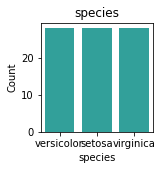

               species  Count  Percent
virginica   versicolor     28    33.33
setosa          setosa     28    33.33
versicolor   virginica     28    33.33
_________________________________________________________________


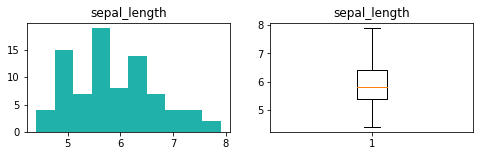

count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64


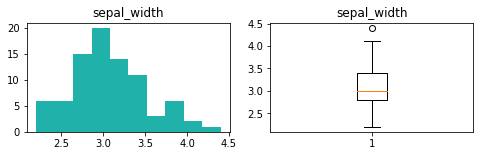

count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64


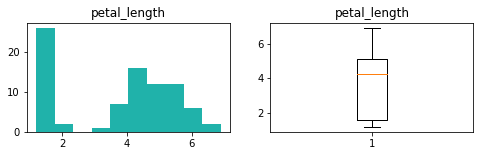

count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


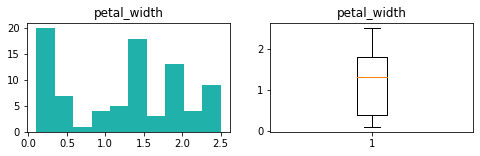

count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


In [51]:
explore.explore_univariate(train, cat_vars, quant_vars)

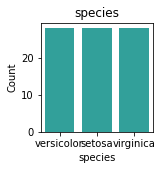

               species  Count  Percent
virginica   versicolor     28    33.33
setosa          setosa     28    33.33
versicolor   virginica     28    33.33


In [52]:
cat_vars = 'species'
quant_vars = ['sepal_length', 'sepal_width', "petal_length", 'petal_width']
explore.explore_univariate_categorical(train, cat_vars)

In [53]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,1,0
36,setosa,5.5,3.5,1.3,0.2,0,0
133,virginica,6.3,2.8,5.1,1.5,0,1
95,versicolor,5.7,3.0,4.2,1.2,1,0
18,setosa,5.7,3.8,1.7,0.3,0,0


In [100]:
 = 

In [107]:
train["setosa"] = np.where(train[["versicolor", "virginica"]].sum(axis=1)==0, 1, 0)

In [108]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica,setosa
79,versicolor,5.7,2.6,3.5,1.0,1,0,0
36,setosa,5.5,3.5,1.3,0.2,0,0,1
133,virginica,6.3,2.8,5.1,1.5,0,1,0
95,versicolor,5.7,3.0,4.2,1.2,1,0,0
18,setosa,5.7,3.8,1.7,0.3,0,0,1


In [102]:
train["setosa"] = (train["setosa"] ==0)

In [111]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica,setosa
79,versicolor,5.7,2.6,3.5,1.0,1,0,0
36,setosa,5.5,3.5,1.3,0.2,0,0,1
133,virginica,6.3,2.8,5.1,1.5,0,1,0
95,versicolor,5.7,3.0,4.2,1.2,1,0,0
18,setosa,5.7,3.8,1.7,0.3,0,0,1


In [109]:
cat_vars = ['species', 'versicolor', 'virginica']
quant_vars = ['sepal_length', 'sepal_width', "petal_length", 'petal_width']

species 
_____________________

   chi2       p-value  degrees of freedom
0  84.0  5.749522e-19                   2

observed:
 versicolor   0   1  All
species                
setosa      28   0   28
versicolor   0  28   28
virginica   28   0   28
All         56  28   84

expected:
            0         1
0  18.666667  9.333333
1  18.666667  9.333333
2  18.666667  9.333333


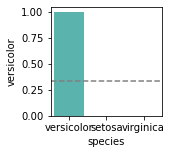


_____________________

versicolor 
_____________________

        chi2       p-value  degrees of freedom
0  79.560268  4.677377e-19                   1

observed:
 versicolor   0   1  All
versicolor             
0           56   0   56
1            0  28   28
All         56  28   84

expected:
            0          1
0  37.333333  18.666667
1  18.666667   9.333333


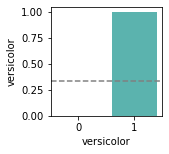


_____________________

virginica 
_____________________

        chi2   p-value  degrees of freedom
0  18.810268  0.000014                   1

observed:
 versicolor   0   1  All
virginica              
0           28  28   56
1           28   0   28
All         56  28   84

expected:
            0          1
0  37.333333  18.666667
1  18.666667   9.333333


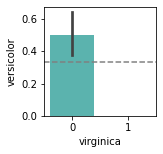


_____________________

sepal_length 
____________________



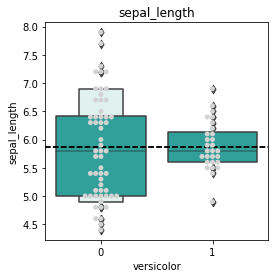

            count      mean       std  min  25%  50%    75%  max
versicolor                                                      
0            56.0  5.857143  0.896226  4.4  5.0  5.8  6.425  7.9
1            28.0  5.896429  0.425556  4.9  5.6  5.8  6.125  6.9 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=732.0, pvalue=0.6245929694453309)

____________________

sepal_width 
____________________



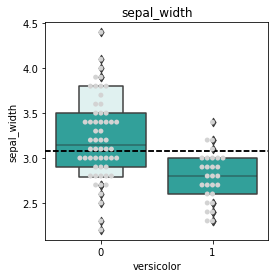

            count      mean       std  min  25%   50%  75%  max
versicolor                                                     
0            56.0  3.214286  0.453042  2.2  2.9  3.15  3.5  4.4
1            28.0  2.796429  0.280848  2.3  2.6  2.80  3.0  3.4 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1226.5, pvalue=2.554781908375443e-05)

____________________

petal_length 
____________________



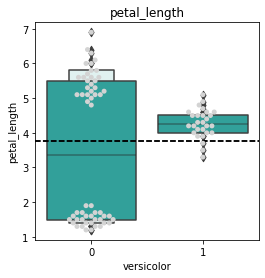

            count      mean       std  min  25%   50%    75%  max
versicolor                                                       
0            56.0  3.521429  2.066153  1.2  1.5  3.35  5.500  6.9
1            28.0  4.271429  0.409930  3.3  4.0  4.25  4.525  5.1 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=776.5, pvalue=0.9469943086791007)

____________________

petal_width 
____________________



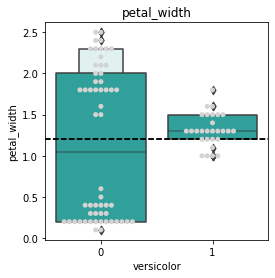

            count      mean       std  min  25%   50%  75%  max
versicolor                                                     
0            56.0  1.148214  0.908744  0.1  0.2  1.05  2.0  2.5
1            28.0  1.314286  0.199470  1.0  1.2  1.30  1.5  1.8 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=767.0, pvalue=0.8750261808643868)

____________________



In [110]:
explore.explore_bivariate(train, "versicolor", cat_vars, quant_vars)

species 
_____________________

   chi2       p-value  degrees of freedom
0  84.0  5.749522e-19                   2

observed:
 virginica    0   1  All
species                
setosa      28   0   28
versicolor  28   0   28
virginica    0  28   28
All         56  28   84

expected:
            0         1
0  18.666667  9.333333
1  18.666667  9.333333
2  18.666667  9.333333


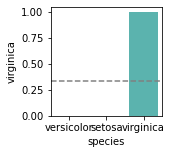


_____________________

sepal_length 
____________________



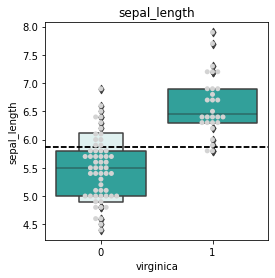

           count      mean       std  min  25%   50%  75%  max
virginica                                                     
0           56.0  5.492857  0.564352  4.4  5.0  5.50  5.8  6.9
1           28.0  6.625000  0.532378  5.8  6.3  6.45  6.9  7.9 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=108.5, pvalue=1.41909909540468e-10)

____________________

sepal_width 
____________________



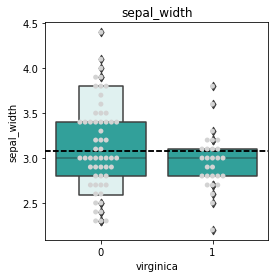

           count      mean       std  min  25%  50%  75%  max
virginica                                                    
0           56.0  3.132143  0.493266  2.3  2.8  3.0  3.4  4.4
1           28.0  2.960714  0.318956  2.2  2.8  3.0  3.1  3.8 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=938.5, pvalue=0.14243061976857382)

____________________

petal_length 
____________________



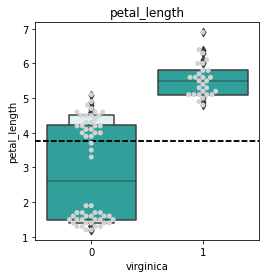

           count      mean       std  min  25%  50%    75%  max
virginica                                                      
0           56.0  2.889286  1.429772  1.2  1.5  2.6  4.225  5.1
1           28.0  5.535714  0.496815  4.8  5.1  5.5  5.800  6.9 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=7.5, pvalue=1.706615327459371e-13)

____________________

petal_width 
____________________



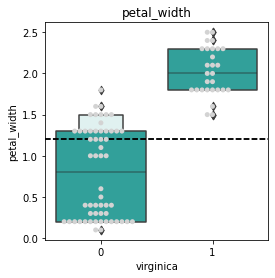

           count      mean       std  min  25%  50%  75%  max
virginica                                                    
0           56.0  0.794643  0.549188  0.1  0.2  0.8  1.3  1.8
1           28.0  2.021429  0.293582  1.5  1.8  2.0  2.3  2.5 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=17.0, pvalue=2.7469459984658354e-13)

____________________



In [68]:
explore.explore_bivariate(train, "virginica", cat_vars, quant_vars)

species 
_____________________

   chi2       p-value  degrees of freedom
0  84.0  5.749522e-19                   2

observed:
 setosa       0   1  All
species                
setosa       0  28   28
versicolor  28   0   28
virginica   28   0   28
All         56  28   84

expected:
            0         1
0  18.666667  9.333333
1  18.666667  9.333333
2  18.666667  9.333333


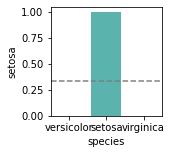


_____________________

versicolor 
_____________________

        chi2   p-value  degrees of freedom
0  18.810268  0.000014                   1

observed:
 setosa       0   1  All
versicolor             
0           28  28   56
1           28   0   28
All         56  28   84

expected:
            0          1
0  37.333333  18.666667
1  18.666667   9.333333


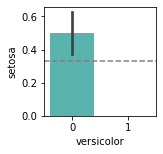


_____________________

virginica 
_____________________

        chi2   p-value  degrees of freedom
0  18.810268  0.000014                   1

observed:
 setosa      0   1  All
virginica             
0          28  28   56
1          28   0   28
All        56  28   84

expected:
            0          1
0  37.333333  18.666667
1  18.666667   9.333333


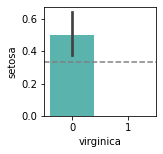


_____________________

sepal_length 
____________________



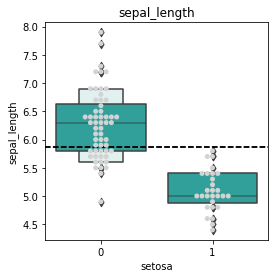

        count      mean       std  min    25%  50%    75%  max
setosa                                                        
0        56.0  6.260714  0.602624  4.9  5.800  6.3  6.625  7.9
1        28.0  5.089286  0.360390  4.4  4.875  5.0  5.400  5.8 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1511.5, pvalue=4.917738517892763e-12)

____________________

sepal_width 
____________________



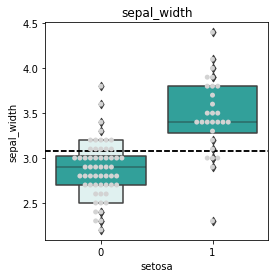

        count      mean       std  min    25%  50%    75%  max
setosa                                                        
0        56.0  2.878571  0.309083  2.2  2.700  2.9  3.025  3.8
1        28.0  3.467857  0.427788  2.3  3.275  3.4  3.800  4.4 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=187.0, pvalue=1.3354452213646879e-08)

____________________

petal_length 
____________________



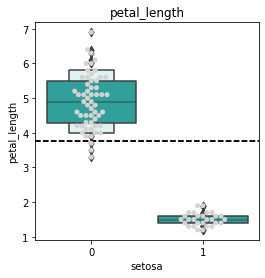

        count      mean       std  min    25%  50%  75%  max
setosa                                                      
0        56.0  4.903571  0.781366  3.3  4.275  4.9  5.5  6.9
1        28.0  1.507143  0.184448  1.2  1.400  1.5  1.6  1.9 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1568.0, pvalue=9.977154348539392e-14)

____________________

petal_width 
____________________



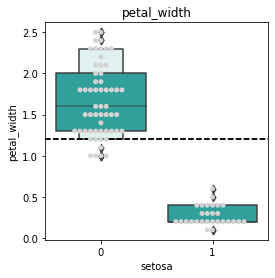

        count      mean       std  min  25%  50%  75%  max
setosa                                                    
0        56.0  1.667857  0.434891  1.0  1.3  1.6  2.0  2.5
1        28.0  0.275000  0.120570  0.1  0.2  0.2  0.4  0.6 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1568.0, pvalue=8.123961949952858e-14)

____________________



In [112]:
explore.explore_bivariate(train, "setosa", cat_vars, quant_vars)